In [1]:
# CS_2225_u2.ipynb
# Unit 2
# 25 May 2025

## **Data smoothing**

is a technique in **data transformation** used to reduce noise, fluctuations, or inconsistencies in a dataset, making patterns more detectable and analysis more reliable. It helps improve the quality of data by eliminating sudden changes or outliers that might interfere with meaningful insights.

### Why Use Data Smoothing?
- **Reduces noise** → Helps remove random variations or errors.
- **Enhances trends** → Makes it easier to identify patterns in data.
- **Improves predictive models** → Helps algorithms make better decisions.
- **Handles outliers** → Smooths irregular data points to prevent extreme variations.

### Common Data Smoothing Techniques:
1. **Moving Average (Rolling Average)**
   - Computes the average of a window of consecutive values.
   - Example: Stock price trends → averaging over the last 7 days.

2. **Weighted Moving Average**
   - Similar to moving average but gives higher importance to recent values.

3. **Exponential Smoothing**
   - Assigns exponentially decreasing weights to older observations.
   - Useful in **time series forecasting**.

4. **Bin Smoothing**
   - Groups similar values into bins, then replaces values with the bin average.
   - Common in data preprocessing.

5. **Regression Smoothing**
   - Fits a regression model to the data, removing unnecessary fluctuations.



In [1]:
import pandas as pd

# Sample data
data = {'Values': [10, 12, 20, 25, 18, 15, 30, 40, 35]}
df = pd.DataFrame(data)

# Apply moving average with a window of 3
df['Smoothed'] = df['Values'].rolling(window=3).mean()

print(df)

   Values   Smoothed
0      10        NaN
1      12        NaN
2      20  14.000000
3      25  19.000000
4      18  21.000000
5      15  19.333333
6      30  21.000000
7      40  28.333333
8      35  35.000000


### **Binning**

is a data transformation technique used to group continuous numerical values into discrete categories or ranges, known as **bins**. It helps reduce noise, improve data interpretation, and enhance the performance of machine learning models.

### Why Use Binning?
- **Smooths Data**: Helps reduce the impact of outliers and noise.
- **Improves Interpretability**: Converts complex numerical data into simpler categories.
- **Enhances Model Performance**: Reduces overfitting by making data more structured.
- **Prepares Data for Algorithms**: Some machine learning models perform better with binned data.

### Types of Binning:
1. **Equal Width Binning**: Divides the data into bins of equal size.
   - Example: If values range from 0 to 100, and we create 4 bins, they could be: **0-25**, **26-50**, **51-75**, **76-100**.

2. **Equal Frequency Binning**: Each bin contains approximately the same number of observations.
   - Example: If we have 100 values, we can divide them into 4 bins, each containing **25 values**.

3. **Custom Binning**: Manually defining bin ranges based on domain knowledge.
   - Example: Age groups → **0-12 (child)**, **13-19 (teen)**, **20-59 (adult)**, **60+ (senior)**.



In [2]:
import pandas as pd

# Sample data
data = {'Age': [5, 16, 29, 45, 67, 80]}
df = pd.DataFrame(data)

# Define bins and labels
bins = [0, 12, 19, 59, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']

# Apply binning
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
#print(df)
df

,Age,Age Group
0,5,Child
1,16,Teen
2,29,Adult
3,45,Adult
4,67,Senior
5,80,Senior


### **Attribute construction** (also known as **feature construction**) 

is a data transformation technique where new attributes (features) are created from existing data to improve the **quality**, **accuracy**, and **predictive power** of a dataset.

### Why Use Attribute Construction?
- **Enhances model performance** → Helps machine learning models capture better patterns.
- **Simplifies complex data** → Converts raw data into more meaningful features.
- **Improves interpretability** → Makes data more useful for analysis.
- **Reduces dimensionality** → Sometimes leads to fewer but more informative features.

### Techniques for Attribute Construction:
1. **Mathematical Transformations**  
   - Example: Creating a `BMI` attribute from `Height` and `Weight` using the formula:  
     $$BMI = \frac{\text{Weight (kg)}}{\text{Height (m)}^2}$$

2. **Aggregations**  
   - Example: Turning hourly temperature readings into daily averages.

3. **Binning (Discretization)**  
   - Example: Converting `Age` into groups like `Child`, `Adult`, and `Senior`.

4. **Domain-Specific Rules**  
   - Example: Creating a new attribute `Risk_Level` based on financial data.

5. **Text Processing Features**  
   - Example: Extracting the length of customer reviews as an attribute.

6. **Date & Time Transformations**  
   - Example: Splitting a timestamp into separate attributes like `Year`, `Month`, `Day`, or `Weekday`.



In [6]:
import pandas as pd

# Sample data
data = {'Height': [1.75, 1.62, 1.80], 'Weight': [68, 55, 78]}
df = pd.DataFrame(data)

# Create BMI attribute
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df

,Height,Weight,BMI
0,1.75,68,22.204082
1,1.62,55,20.957171
2,1.80,78,24.074074


### Min-Max Scaling

Min-Max Scaling is a normalization technique used in data preprocessing to rescale numerical values into a fixed range, typically [0,1] or [-1,1]. It ensures that all data points are on a uniform scale without distorting relative relationships.

Formula for Min-Max Scaling
Given a value X in the dataset, Min-Max scaling transforms it as:

$$X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$$



Where:
- X_min = Minimum value in the dataset
- X_max = Maximum value in the dataset
- X_new = Scaled value



In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = np.array([[50], [30], [90], [60], [20]])

# Apply Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# print(scaled_data)
scaled_data


array([[0.42857143],
       [0.14285714],
       [1.        ],
       [0.57142857],
       [0.        ]])

### **Z-score normalization** (also called **standardization**) 

is a **data transformation** technique that rescales numerical values by centering them around the **mean** and adjusting for **standard deviation**. This helps ensure all features have the same scale, making data more suitable for machine learning.

### **Formula for Z-Score Normalization**

$$[X_{new} = \frac{X - \mu}{\sigma}]$$


Where:



$$X \rightarrow \text{Original value in the dataset}$$

$$\mu \rightarrow \text{Mean of the dataset}$$

$$\sigma \rightarrow \text{Standard deviation of the dataset}$$
$$X_{new} \rightarrow \text{Transformed (normalized) value}$$


### **Why Use Z-Score Normalization?**
✅ **Centers data around 0** → Mean becomes **0**, and variance becomes **1**  
✅ **Handles outliers better than Min-Max scaling**  
✅ **Useful for algorithms like PCA, K-Means, Linear Regression, SVM**  
✅ **Removes units** → Allows fair comparison across different scales  



Now, the values have **mean ≈ 0** and **standard deviation ≈ 1**, making them standardized.

### **Comparison with Min-Max Scaling**
| **Method**         | **Range**       | **Handles Outliers?** | **Use Case** |
|--------------------|----------------|----------------------|--------------|
| **Min-Max Scaling** | `[0,1]` or `[-1,1]` | ❌ No | When data is evenly distributed |
| **Z-Score Scaling** | No fixed range | ✅ Yes | When data has extreme variations |
| **Robust Scaling** | No fixed range | ✅ Yes | When handling heavy outliers |



In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = np.array([[50], [30], [90], [60], [20]])

# Apply Z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#print(scaled_data)
scaled_data

array([[ 0.        ],
       [-0.81649658],
       [ 1.63299316],
       [ 0.40824829],
       [-1.22474487]])

 ## **Sample Space** and **Events** 

### **1. Sample Space (Ω)**
The **Sample Space** is the set of all possible outcomes of an experiment.

#### **Example in Data Science**
Imagine a model predicting customer satisfaction as **Positive, Neutral, or Negative**. The sample space is:
$$
[
\Omega = \{\text{Positive, Neutral, Negative}\}
]
$$
Each outcome represents a possible result of an observation.

#### **Example in Dice Rolls**
For rolling a six-sided die:
$$
[
\Omega = \{1, 2, 3, 4, 5, 6\}
]
$$
Every possible outcome belongs to the sample space.

---

### **2. Events (E)**
An **Event** is a subset of the sample space—it represents specific outcomes of interest.

#### **Example in Data Science**
- Let **Event \( E \)** be users who rated a product **"Positive"**  

$$
[
  E = \{\text{Positive}\}
]
$$
- Or, let **Event \( F \)** be users **not satisfied**
$$
[
  F = \{\text{Neutral, Negative}\}
]
$$
Events help analyze **probabilities of real-world occurrences**.

#### **Example in Dice Rolls**
- **Event \( A \)**: Rolling an even number

  [
  A = \{2, 4, 6\}
  \]
- **Event \( B \)**: Rolling a number less than 4  
  \[
  B = \{1, 2, 3\}
  \]

---

### **Probability & Events in Data Science**
Probabilities are assigned to events based on observations or assumptions:

$$
[
P(E) = \frac{\text{Favorable Outcomes}}{\text{Total Outcomes}}
]
$$

For instance, if **60% of customers rate a product positively**, then:

\[
P(E) = 0.6
\]

Events help in **decision-making, risk analysis, and predictive modeling**.



### **Probability in Data Science**
**Probability** is the foundation of data science, used to quantify uncertainty and make predictions based on data patterns. It plays a crucial role in **machine learning, statistics, and decision-making models**.

---

### **Why Probability Matters in Data Science?**
✅ **Predictive Modeling** → Helps estimate future outcomes (e.g., will a customer buy a product?).  
✅ **Classification & Clustering** → Used in algorithms like **Naïve Bayes**, **Logistic Regression**, and **Hidden Markov Models**.  
✅ **Statistical Inference** → Determines likelihood of events, crucial for **A/B Testing** and hypothesis testing.  
✅ **Risk Assessment** → Helps in fraud detection, disease prediction, and financial analysis.  

---

### **Core Probability Concepts in Data Science**
1️⃣ **Sample Space (Ω):**  
   - The set of all possible outcomes.  
   - Example: Rolling a die → `Ω = {1, 2, 3, 4, 5, 6}`  

2️⃣ **Events (E):**  
   - A subset of the sample space.  
   - Example: Rolling an even number → `E = {2, 4, 6}`  

3️⃣ **Probability of an Event (P(E)):**  
   - Likelihood of an event occurring:
$$
   [
   P(E) = \frac{\text{Favorable Outcomes}}{\text{Total Outcomes}}
   ]
$$
   - Example: Probability of rolling a **2** → `P(2) = 1/6`

4️⃣ **Conditional Probability:**  
   - Probability of event **A** happening **given** event **B** has already occurred.  
$$   
[
   P(A | B) = \frac{P(A \cap B)}{P(B)}
] 
$$
   - Example: Probability that a customer **buys a product**, given they **visited the website**.

5️⃣ **Bayes’ Theorem:**  
   - Used in **classification algorithms** and **spam detection**.
$$
[
   P(A|B) = \frac{P(B|A) P(A)}{P(B)}
]
$$

6️⃣ **Probability Distributions:**  
   - **Normal Distribution** → Data follows a bell curve (used in ML).  
   - **Binomial Distribution** → Probability of success/failure over multiple trials.  
   - **Poisson Distribution** → Used for rare event occurrences (e.g., network failures).

---

### **Real-World Applications in Data Science**
🚀 **Spam Filtering** → Classifies emails based on word probability (Naïve Bayes).  
📈 **Stock Market Predictions** → Uses probabilistic models to estimate future trends.  
🔎 **Fraud Detection** → Probability helps detect unusual transactions.  
🩺 **Medical Diagnosis** → Identifies disease likelihood based on symptoms.

Probability helps **extract meaningful insights from data** and drives intelligent decision-making in AI and ML models. 

### **Understanding Probability Distributions in Data Science**
A **probability distribution** defines how values of a random variable are distributed—it describes the likelihood of different possible outcomes.

---

### **Types of Probability Distributions**
#### 1️⃣ **Discrete Probability Distributions** (Finite Outcomes)
Used when the variable can take only specific values (e.g., **counts, categories**).
✅ **Binomial Distribution** → Models the probability of success/failure over multiple trials  
✅ **Poisson Distribution** → Used for rare events (e.g., the number of website crashes per day)

#### 2️⃣ **Continuous Probability Distributions** (Infinite Outcomes)
Used when the variable can take any value within a range (e.g., **height, temperature**).
✅ **Normal Distribution** (Gaussian) → Bell-shaped curve; real-world phenomena often follow this  
✅ **Exponential Distribution** → Describes waiting times between events  

---

### **Common Distributions in Data Science**
| **Distribution**      | **Type**     | **Use Case** |
|----------------------|-------------|--------------|
| **Normal (Gaussian)** | Continuous | Stock price prediction, IQ scores |
| **Binomial**         | Discrete    | Coin tosses, survey responses |
| **Poisson**         | Discrete    | Modeling rare events like fraud detection |
| **Exponential**      | Continuous | Waiting times for a customer service call |

---

### **Real-World Example: Normal Distribution**
Many natural phenomena follow a **Normal Distribution**, which looks like a symmetric bell curve:
$$
[
X \sim \mathcal{N}(\mu, \sigma^2)
]
$$
Where:
- **\( \mu \)** = Mean (center of distribution)
- **\( \sigma^2 \)** = Variance (spread of data)




## **Common probability distributions**

### 1. **Normal (Gaussian) Distribution**  
The famous bell curve, characterized by mean \( \mu \) and standard deviation \( \sigma \).

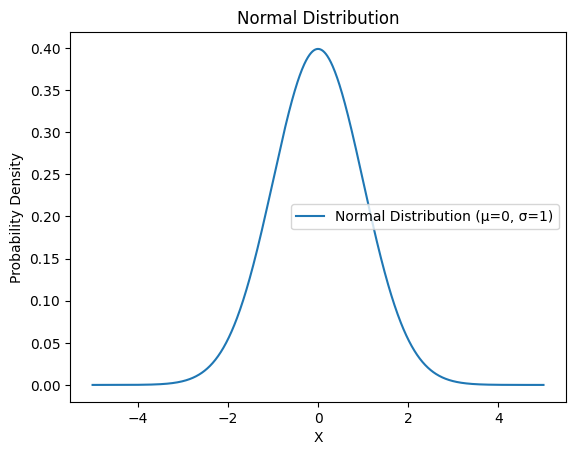

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, loc=0, scale=1)

plt.plot(x, y, label="Normal Distribution (μ=0, σ=1)")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Normal Distribution")
plt.legend()
plt.show()

### 2. **Binomial Distribution**  
Models the number of successes in \( n \) independent Bernoulli trials.


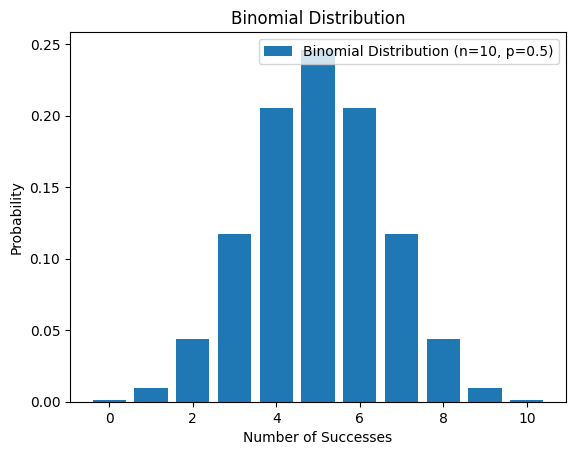

In [12]:
from scipy.stats import binom

n, p = 10, 0.5  # Number of trials, probability of success
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.bar(x, y, label="Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.title("Binomial Distribution")
plt.legend()
plt.show()

PMF stands for **Probability Mass Function**. It represents the probability of a discrete random variable taking a specific value.

In `binom.pmf(x, n, p)`, the **PMF** of the binomial distribution calculates the probability that a random variable \( X \) (number of successes) equals \( x \) given:
- \( n \): the total number of trials
- \( p \): the probability of success in each trial

Mathematically, the binomial PMF is defined as:
$$
[
P(X = x) = \binom{n}{x} p^x (1-p)^{n-x}
]
$$
where \( \binom{n}{x} \) is the binomial coefficient.

An example calculation is given below:

Let's go through an example calculation using the binomial PMF formula.

### Problem Statement:
Suppose you flip a **fair coin** (with \( p = 0.5 \)) **10 times** (\( n = 10 \)), and you want to find the probability of getting exactly **4 heads** (\( x = 4 \)).

### Using the formula:

$$
[
P(X = 4) = \binom{10}{4} (0.5)^4 (0.5)^{6}
]
$$
where \( \binom{10}{4} \) is the binomial coefficient:

$$
[
\binom{10}{4} = \frac{10!}{4!(10-4)!} = \frac{10!}{4!6!} = 210
]
$$
### Final Calculation:

$$
[
P(X = 4) = 210 \times (0.5)^4 \times (0.5)^6
]
$$

$$
[
= 210 \times 0.000976 \approx 0.205
]
$$

Thus, the probability of getting **exactly 4 heads** in 10 coin flips is **0.205 (or 20.5%)**.

### Python Code:




In [13]:

from scipy.stats import binom

n, p, x = 10, 0.5, 4  # Trials, probability of success, number of successes
probability = binom.pmf(x, n, p)

print(f"Probability of getting exactly 4 heads: {probability:.4f}")


Probability of getting exactly 4 heads: 0.2051


### 3. **Poisson Distribution**  
Used to model the count of rare events over a fixed interval.


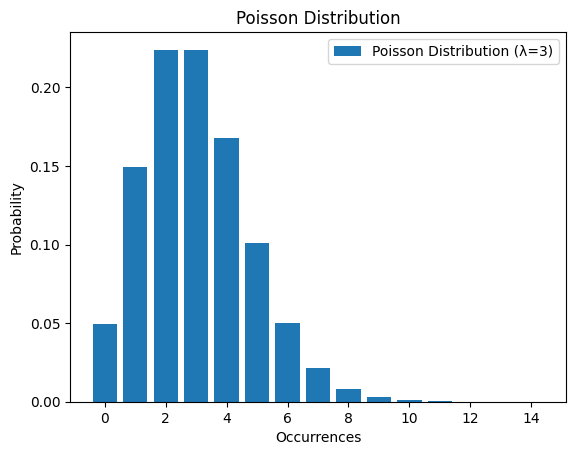

In [14]:
from scipy.stats import poisson

mu = 3  # Expected occurrences
x = np.arange(0, 15)
y = poisson.pmf(x, mu)

plt.bar(x, y, label="Poisson Distribution (λ=3)")
plt.xlabel("Occurrences")
plt.ylabel("Probability")
plt.title("Poisson Distribution")
plt.legend()
plt.show()

### 4. **Exponential Distribution**  
Models the time between independent events.


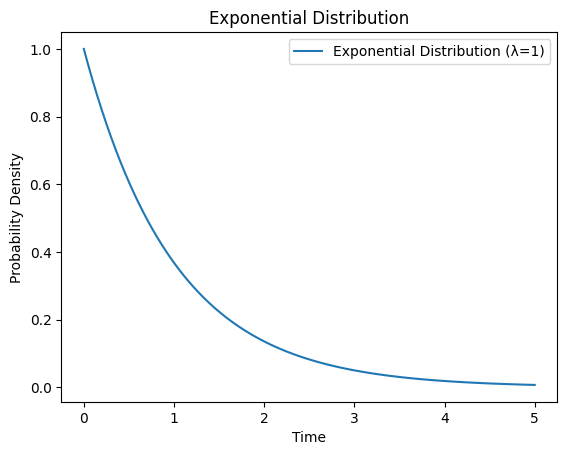

In [15]:
from scipy.stats import expon

x = np.linspace(0, 5, 100)
y = expon.pdf(x, scale=1)

plt.plot(x, y, label="Exponential Distribution (λ=1)")
plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.title("Exponential Distribution")
plt.legend()
plt.show()

### 5. **Uniform Distribution**  
All values in the range are equally probable.


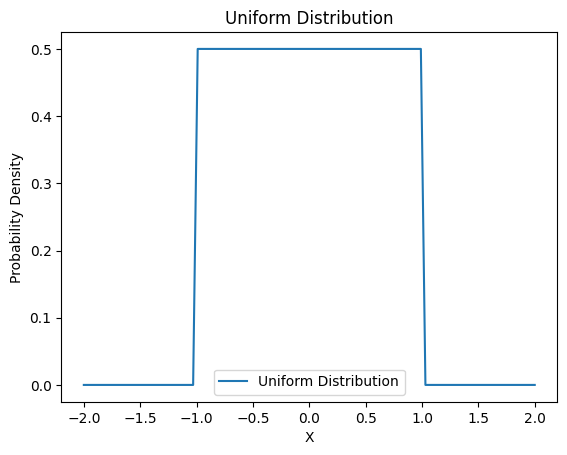

In [16]:

from scipy.stats import uniform

x = np.linspace(-2, 2, 100)
y = uniform.pdf(x, loc=-1, scale=2)

plt.plot(x, y, label="Uniform Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Uniform Distribution")
plt.legend()
plt.show()
